# Brent Oil Price Analysis and Prediction
Members: David, Brienne Khayla C. &
         Dizon, John Ivan D.

dataset URL = https://datahub.io/core/oil-prices/r/brent-daily.csv

## # Importing Libraries


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor

# Load the Dataset

In [56]:
data = pd.read_csv("https://datahub.io/core/oil-prices/r/brent-daily.csv")

# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Month_Name'] = data['Date'].dt.strftime('%B')  # Adding month name for visualization

# Data Cleaning
data.dropna(subset=['Price'], inplace=True)

# EDA: Plotting Historical Prices

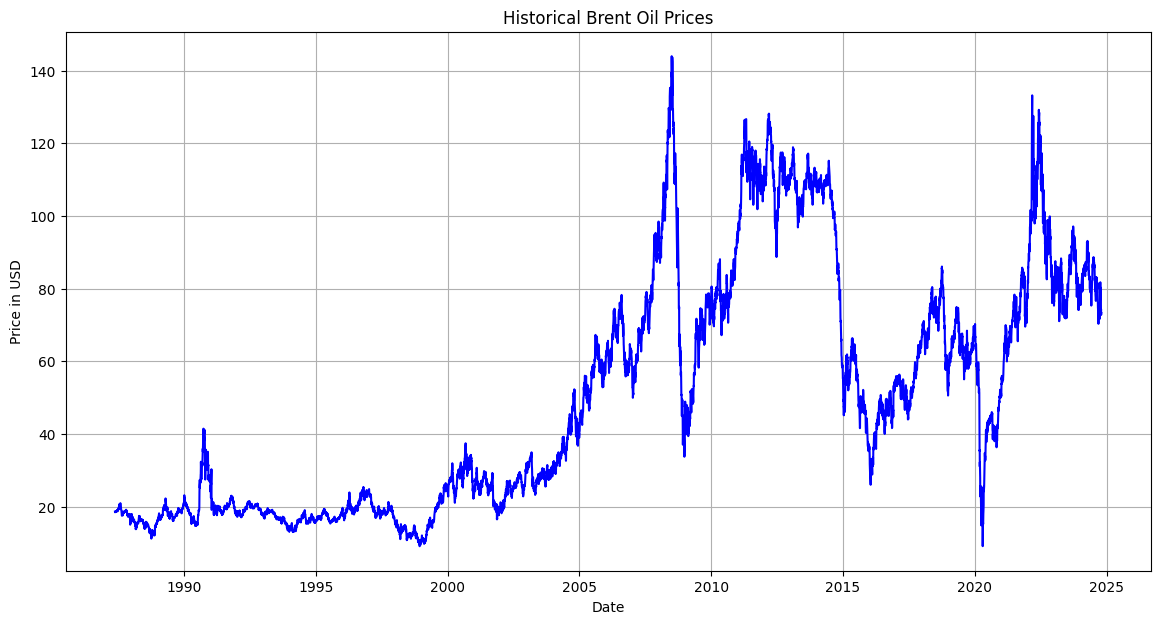

In [57]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Price'], color='blue')
plt.title('Historical Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.grid()
plt.show()

# Monthly Average Price by Year (Heatmap)

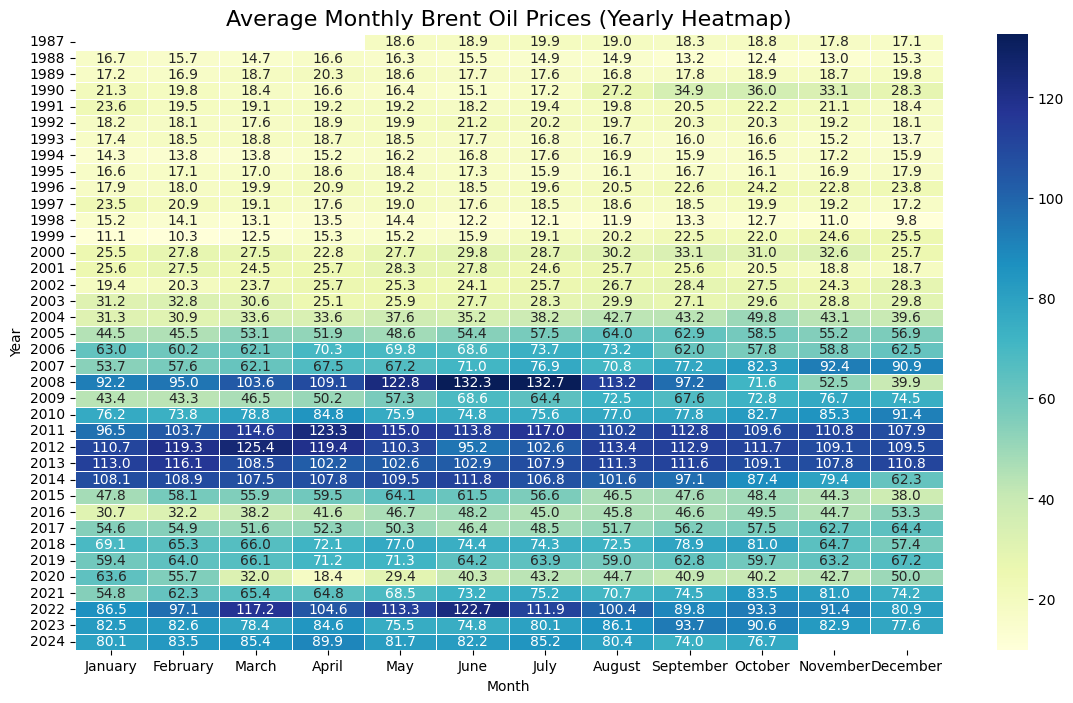

In [58]:
monthly_yearly_avg = data.groupby(['Year', 'Month_Name'])['Price'].mean().unstack()

# Sorting columns to ensure calendar order
monthly_yearly_avg = monthly_yearly_avg[['January', 'February', 'March', 'April', 'May', 'June',
                                         'July', 'August', 'September', 'October', 'November', 'December']]

plt.figure(figsize=(14, 8))
sns.heatmap(monthly_yearly_avg, cmap="YlGnBu", annot=True, fmt=".1f", linewidths=.5)
plt.title("Average Monthly Brent Oil Prices (Yearly Heatmap)", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

# Distribution of Oil Prices

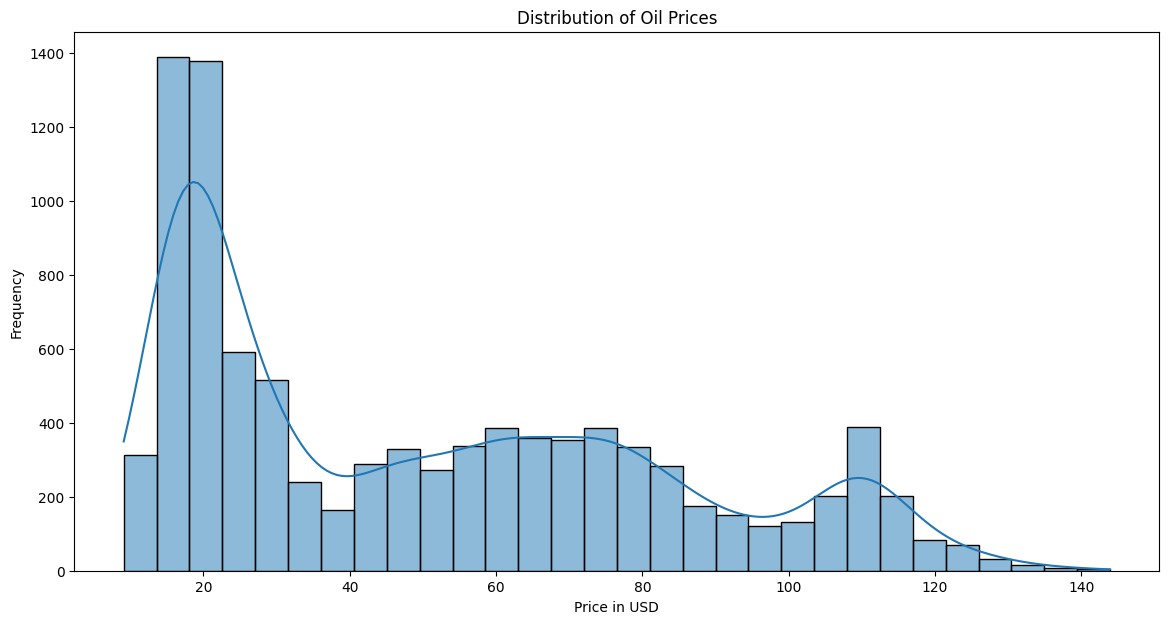

In [59]:
plt.figure(figsize=(14, 7))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribution of Oil Prices')
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.show()

# Prepare Data for Modeling with Polynomial Features

In [60]:
X = data[['Year', 'Month']]
y = data['Price']

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)  # Change degree if necessary
X_poly = poly.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Model Definitions

In [61]:
models = {
    'XGBoost': XGBRegressor(random_state=42, n_estimators=100),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=5),  # Limited depth to avoid overfitting
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42, n_estimators=100)
}

# Training and Predictions

In [62]:
predictions = {}
performance = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    predictions[name] = preds
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    performance[name] = {
        'MSE': mse,
        'R²': r2,
        'Meets 85% Criterion': r2 >= 0.85
    }

# Evaluate Models

In [63]:
for name, metrics in performance.items():
    print(f"{name} - MSE: {metrics['MSE']:.2f}, R²: {metrics['R²']:.2f} - Meets 85% Criterion: {'Yes' if metrics['Meets 85% Criterion'] else 'No'}")

XGBoost - MSE: 5.54, R²: 1.00 - Meets 85% Criterion: Yes
Decision Tree - MSE: 78.44, R²: 0.93 - Meets 85% Criterion: Yes
Random Forest - MSE: 5.50, R²: 1.00 - Meets 85% Criterion: Yes
Gradient Boosting - MSE: 31.83, R²: 0.97 - Meets 85% Criterion: Yes
